<a href="https://colab.research.google.com/github/dinorahfariasc/cienciaDados-UFRN/blob/main/aula_Estat%C3%ADsticaInferencial_parteIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula Estatística Inferencial (parte 3)

## Teste de hipóteses

Fornecer uma medida da variabilidade de nossas estimativas é uma forma de produzir uma proposição estatística sobre a população, mas não a única. R.A.Fisher (1890-1962) propôs uma alternativa, conhecida como *teste de hipótese*, que é baseado no conceito de *significância estatística*.

Vamos supor que uma análise mais profunda dos acidentes de trânsito em Barcelona resulte em uma diferença entre 2010 e 2013. Obviamente, a diferença poderia ser causada apenas pelo acaso, devido à variabilidade de ambas as estimativas. Mas também pode ser o caso de as condições de tráfego serem muito diferentes em Barcelona durante esses dois períodos e, por isso, os dados desses dois períodos podem ser considerados como pertencentes a duas populações diferentes. Então, a questão relevante é: os efeitos observados são reais ou não?

O processo de determinar a significância estatística de um efeito é chamado de
**teste de hipóteses**. Esse processo começa simplificando as opções em duas
hipóteses concorrentes:

+ $H_0$: O número médio de acidentes de trânsito diários é o mesmo em 2013 e 2010 (há apenas uma população, uma média verdadeira, e 2010 e 2013 são apenas amostras diferentes da mesma população).

+ $H_A$: O número médio de acidentes de trânsito diários para 2010 e para 2013 é diferente (2010 e 2013 são duas amostras de duas populações diferentes).

Chamamos $H_0$ de *hipótese nula* e ela representa um ponto de vista cético:
o efeito que observamos é devido ao acaso (devido ao viés específico da amostra).

$H_A$ é a *hipótese alternativa* e representa o outro ponto de vista:
o efeito é real.

A regra geral do teste de hipótese frequentista é: Não descartaremos $H_0$
(e, portanto, não consideraremos $H_A$) a menos que o efeito observado seja pouco provável sob $H_0$.

### Testando hipóteses usando intervalos de confiança.

Podemos usar o conceito representado pelos intervalos de confiança para medir a plausibilidade de uma hipótese.

Podemos ilustrar a avaliação da configuração das hipóteses comparando a
taxa média de acidentes de trânsito em Barcelona durante 2010 e 2013 usando uma estimativa pontual da amostra de 2013:

In [1]:
import matplotlib.pylab as plt
from matplotlib import cm
import math
import pandas as pd
import numpy as np
import random

%matplotlib inline
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('font', size=12)

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/DataScienceUB/introduction-datascience-python-book/master/files/ch04/ACCIDENTS_GU_BCN_2010.csv", encoding='latin-1')
#Create a new column which is the date
data['Date'] = data['Dia de mes'].apply(lambda x : str(x)) + '-' +  \
               data['Mes de any'].apply(lambda x : str(x))
data2 = data['Date']
counts2010 =data['Date'].value_counts()

data = pd.read_csv("https://raw.githubusercontent.com/DataScienceUB/introduction-datascience-python-book/master/files/ch04/ACCIDENTS_GU_BCN_2013.csv", encoding='latin-1')
#Create a new column which is the date
data['Date'] = data['Dia de mes'].apply(lambda x : str(x)) + '-' +  \
               data['Mes de any'].apply(lambda x : str(x))
data2 = data['Date']
counts2013 = data['Date'].value_counts()


In [3]:
counts2013

Date
19-12    48
8-3      47
23-4     46
19-7     46
13-12    46
         ..
3-8       9
20-5      9
25-8      9
30-3      6
3-11      5
Name: count, Length: 365, dtype: int64

In [4]:
# calcule a média de taxa de acidentes em cada um dos anos
print(counts2010.mean())
print(counts2013.mean())

24.81095890410959
25.90958904109589


Essa estimativa sugere que, em 2013, a taxa média de
acidentes de trânsito em Barcelona **foi maior** do que em 2010. Mas esse efeito é estatisticamente significativo?

Com base em nossa amostra, o intervalo de confiança de 95% para a taxa média de acidentes de trânsito em Barcelona em 2013 pode ser calculado como:

$$\bar{x} \pm EP * z_{\frac{\alpha}{2}}$$

Sendo que:
  * $EP = \frac{\sigma}{\sqrt{n}}$
  * Para IC95, $z_{\frac{\alpha}{2}}$ corresponde a 1,96.

In [5]:
# Calcule o intervalo de confiança de 95% para a média da taxa de acidente em 2013.
# A média estimada de 2010 está nesse intervalo?
m = counts2013.mean()
n = len(counts2013)
s = counts2013.std()
z = np.array([-1.96,1.96])
ci = m + z*(s/n**0.5)
ci


array([24.97515607, 26.84402202])

Como a estimativa da taxa de acidentes de 2010 não se enquadra no intervalo de valores plausíveis de 2013, dizemos que a hipótese alternativa não pode ser descartada. Ou seja, não se pode descartar o fato de que, em 2013, a taxa média de acidentes de trânsito em Barcelona foi maior do que em 2010.

### Testando hipóteses usando valores P.

Uma noção mais avançada de significância estatística foi desenvolvida por R. A. Fisher na década de 1920, ao procurar um teste para decidir se a variação no rendimento das colheitas era devida a alguma intervenção específica ou apenas a fatores aleatórios fora do controle experimental. Fisher primeiro presumiu que o fertilizante não causava diferença (hipótese nula) e, em seguida, calculou $P$, a probabilidade de que um rendimento observado em um campo fertilizado ocorreria se o fertilizante não tivesse efeito real. Essa probabilidade é chamada de **valor p**.

O **valor p** é a probabilidade de observar o conjunto de dados observados ou mais extremos sobre a suposição de que a hipótese nula é verdadeira.

Para aplicar um teste de hipóteses ao nosso problema, a primeira etapa é quantificar o tamanho do efeito aparente escolhendo uma estatística de teste. Em nosso caso, o efeito aparente é uma diferença nas taxas de acidentes.
Portanto, uma escolha natural para a estatística de teste é a diferença entre as médias entre os dois períodos:

In [10]:
# Calcule a diferença entre as médias estimadas de 2013 e 2010
diffm = counts2013.mean() - counts2010.mean()
diffm

1.0986301369863014

A segunda etapa é definir uma hipótese nula, que é um modelo do sistema baseado na suposição de que o efeito aparente não é real. Em
nosso caso, a hipótese nula é que não há diferença entre os dois
períodos. A hipótese alternativa é que, em 2013, a taxa média de acidentes de trânsito em Barcelona foi maior do que em 2010. Podemos escrever as hipóteses desta forma:

$$H_0: \mu_{2013} - \mu_{2010} = 0\\
H_1: \mu_{2013} - \mu_{2010} > 0$$

A terceira etapa é calcular um valor p, que é a probabilidade de ver
o efeito aparente se a hipótese nula for verdadeira. Em nosso caso, nós
calcularemos a diferença das médias e, em seguida, calcular a probabilidade de ver esta diferença, ou maior, sob a hipótese nula.

Normalmente, se P valor for menor que 0,05 (a chance de um erro é menor que 5%), o resultado é declarado estatisticamente significativo.

Para aproximar o valor de p, podemos utilizar a abordagem do bootstrapping e seguir os seguintes procedimentos:
1. Junte os dois dados em um pool.
2. Gere duas amostras com tamanho $n$ e calcule a diferença das médias entre eles.
3. Conte quantas diferenças são maiores do que a observada

Text(0.5, 1.0, 'Pooled distribution')

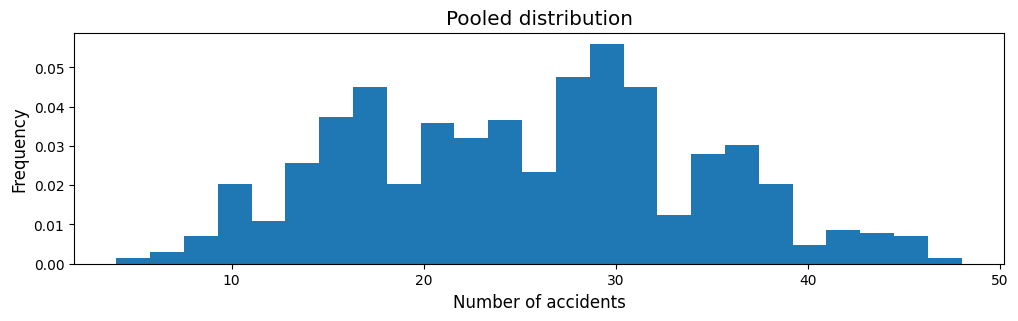

In [11]:
# Junte os dois dados em um pool.
x = counts2010
y = counts2013
pool =  pd.concat([x,y]) # coloque os dados concatenados nesta variável

# em seguida, misture as linhas
pool = pool.sample(frac=1)

# Deixe o código abaixo
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
plt.hist(pool,
         bins = 25,
         density = True)
plt.ylabel('Frequency')
plt.xlabel('Number of accidents')
plt.title("Pooled distribution")

Text(0.5, 0, 'Difference in the mean')

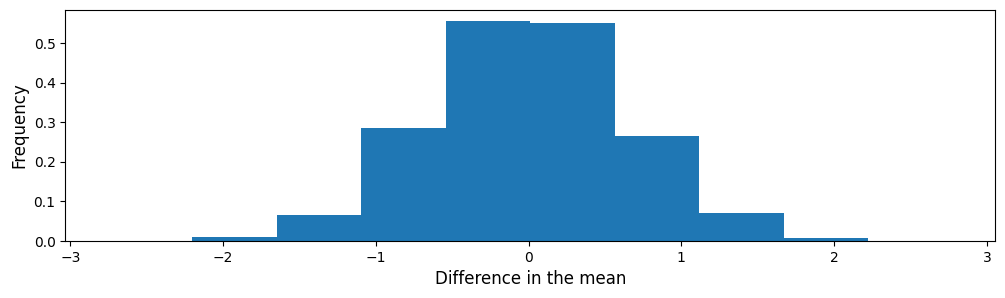

In [34]:
# Faça 10000 reamostragens calculando para cada uma a diferença entre as médias
# obs.: para cada reamostragem amostraremos duas amostras de tamanhos m e n do dado que está em pool.
# A partir das duas amostras, calculamos a diferença entre as duas médias.
N = 10000 # número de reamostragens
m = len(counts2010) # tamanho da amostra de 2010
n = len(counts2013) # tamanho da amostra de 2013
diff = np.zeros(N) # armazene aqui as diferenças entre as amostras

# complete o código aqui fazendo as reamostragens
for i in range(N):
    s1 = pool.sample(n,replace=True)
    s2 = pool.sample(m, replace=True)
    diff[i] = s1.mean() - s2.mean()


# Deixe o código abaixo
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
plt.hist(diff, density = True)
plt.ylabel('Frequency')
plt.xlabel('Difference in the mean')

rejeicao hipotese nula, rejeita as porcoes de 2,5% e 2,5% finais e iniciais, caso a hipotese seja > 0, todo os 5% passa para a parte final

In [35]:
# Determine a quantidade de diferenças que foi diferente a diferença observada.
(diff > diffm).sum()

458

Se houver $k$ pares de amostras em que a diferença na média seja tão grande quanto ou maior que a diferença observada (1,098), o valor de p será aproximadamente $k/N$. No nosso caso:

In [36]:
# Calcule o valor P
(diff > diffm).sum()/N

0.0458

Definimos o efeito como uma diferença na média é igual ou maior do que a diferença observada, levando em conta o sinal. Um teste como esse é chamado de *unilateral*.

Se a questão relevante for se as médias de acidentes são diferentes, então faz sentido testar a diferença absoluta nas médias. Esse tipo de teste é chamado de *two-sided* (dois lados) porque ele conta os dois lados da distribuição das diferenças.

## Exercício

Os dados a seguir contém uma porção de dados da Pesquisa Nacional de Saúde e Nutrição, conhecida como NHANES. NHANES é uma grande pesquisa nacional realizada pelos Centros de Controle e Prevenção de Doenças (CDC) dos EUA. De acordo com o CDC, ele foi “projetado para avaliar a saúde e o estado nutricional de adultos e crianças nos Estados Unidos”. A ideia é que ela seja uma pesquisa nacionalmente representativa cujos resultados possam ser generalizados para a população americana. Além disso, o NHANES é extraordinariamente abrangente no que diz respeito às pesquisas de saúde, pois combina entrevistas e exames físicos.

Aqui, veremos um subconjunto de 1.991 participantes da pesquisa da versão 2011-12 da pesquisa, com foco em algumas questões sobre sono e depressão. (O conjunto de dados completo tem mais informações do que você verá nestes dados.) O arquivo NHANES_sleep contém informações sobre gênero, idade, raça/etnia autodeclarada e status de propriedade da casa. Ele também contém algumas informações sobre saúde: 1) o número de horas auto-relatado que cada participante do estudo costuma passar à noite durante a semana ou dias de trabalho; 2) se o entrevistado fumou 100 ou mais cigarros na vida (sim ou não); e 3) a frequência autorreferida de dias por mês em que o participante se sentiu para baixo, deprimido ou sem esperança, onde as opções são “None”, “Several”, “Most” (mais da metade dos dias) ou “Almost all”.

In [15]:
data = pd.read_csv("https://bookdown.org/jgscott/DSGI/data/NHANES_sleep.csv")
data

,SleepHrsNight,Gender,Age,Race_Ethnicity,HomeOwn,Depressed,Smoke100
0,4,female,56,Black,Own,NaN,Yes
1,7,male,34,White (NH),Rent,NaN,No
2,7,male,27,White (NH),Rent,NaN,No
3,9,male,50,White (NH),Own,NaN,No
4,6,male,80,Black,Rent,NaN,No
...,...,...,...,...,...,...,...
1986,5,female,23,Black,Own,NaN,No
1987,8,female,39,White (NH),Own,NaN,Yes
1988,6,female,55,White (NH),Rent,Several,No
1989,4,female,23,Black,Own,Most,No


In [16]:
data.describe(include="all")

,SleepHrsNight,Gender,Age,Race_Ethnicity,HomeOwn,Depressed,Smoke100
count,1991.000000,1991,1991.000000,1991,1991,405,1991
unique,NaN,2,NaN,5,3,2,2
top,NaN,male,NaN,White (NH),Own,Several,No
freq,NaN,1006,NaN,1367,1283,274,1105
mean,6.878955,NaN,48.127072,NaN,NaN,NaN,NaN
std,1.317419,NaN,17.180169,NaN,NaN,NaN,NaN
min,2.000000,NaN,20.000000,NaN,NaN,NaN,NaN
25%,6.000000,NaN,33.000000,NaN,NaN,NaN,NaN
50%,7.000000,NaN,48.000000,NaN,NaN,NaN,NaN
75%,8.000000,NaN,61.000000,NaN,NaN,NaN,NaN


A partir desses dados pede-se:

In [28]:
# Calcule o número de pacientes em cada gênero
data.Gender.value_counts()

Gender
male      1006
female     985
Name: count, dtype: int64

In [33]:
# Calcule a média do número de horas de sono (SleepHrsNight) por gênero
data.groupby('Gender').SleepHrsNight.mean()

Gender
female    6.996954
male      6.763419
Name: SleepHrsNight, dtype: float64

In [49]:
# Calcule o intervalo de confiança de 95% da média de horas de sono das pacientes femininas.
fem = data[data.Gender == 'female'].SleepHrsNight
m = fem.mean()
n = len(fem)
s = fem.std()
epf = s/n
z = np.array([-1.96,1.96])
cfem = m + z*(s/n**0.5)
print(f"intevalo de confiança de 95% das mulheres",cfem)

# Verifique se a média de horas de sono dos pacientes masculinos encontram-se neste intervalo
masc = data[data.Gender == 'male'].SleepHrsNight
m = masc.mean()
print(f"media de horas de sono dos homens {m.round(2)}")
n = len(masc)
s = masc.std()
z = np.array([-1.96,1.96])
cmasc = m + z*(s/n**0.5)
print(f"intevalo de confiança de 95% dos homens",cmasc)



intevalo de confiança de 95% das mulheres [6.91162586 7.08228277]
media de horas de sono dos homens 6.76
intevalo de confiança de 95% dos homens [6.68569984 6.84113913]


In [58]:
# Calcule a diferença entre as duas médias
diffm = fem.mean() - masc.mean()
diffm

0.23353483161942012

In [62]:
# Será que a estatística te fornece suporte estatístico para dizer que as duas amostras foram retiradas de populações com médias distintas?
# Em outras palavras, um grupo dorme mais que o outro?
# H0: M1 - M2 == 0
# Ha: M1 - M2 != 0
# Realize o bootstrapping com 10000 reamostragem e calcule para cada reamostragem a diferença absoluta das médias das amostras.
N = 10000
pool = data.SleepHrsNight
diff = np.zeros(N)
m = (data.Gender == 'female').sum()
n = (data.Gender == 'male').sum()

for i in range(N):
    s1 = pool.sample(n,replace=True)
    s2 = pool.sample(m, replace=True)
    diff[i] = abs(s1.mean() - s2.mean())


Text(0.5, 0, 'Difference in the mean')

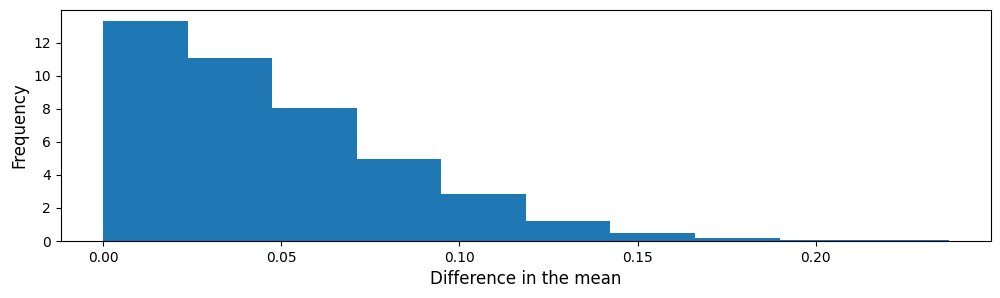

In [63]:
# plote um histograma da distribuição das médias amostrais
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
plt.hist(diff, density = True)
plt.ylabel('Frequency')
plt.xlabel('Difference in the mean')

In [64]:
# Conte o número de diferenças cujo valor absoluto foi maior que o observado. (two-sided)
(diff > diffm).sum()

1

In [65]:
# Calcule o valor p para este teste.
(diff > diffm).sum()/N

0.0001

In [ ]:
# Qual a conclusão sobre o teste?
# EXISTE UM DIFERENCA SIGNIFICATIVA, SAO POPULACOES DIFERENTES

## Referência

Este notebook foi baseado no capítulo 4 do livro "Introduction to Data Science" de Laura Igual e Santi Seguí (2017)

https://bookdown.org/jgscott/DSGI/the-bootstrap.html